# <center>R3.08 - Probabilités <br>TP1 - Random number generators (RNG)<center>


_Tom Ferragut, Thibault Godin_

_IUT de Vannes, BUT Informatique_

In [2]:
import random

import numpy as np

# This is how we import the module of Matplotlib we'll be using
import matplotlib.pyplot as plt

# Some pretty Seaborn settings
#import seaborn as sns
#rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18}
#sns.set(rc=rc)

## 1 - Introduction 

**La génération de nombres pseudo-aléatoires** (Random number generation, ou RNG) est le processus par lequel une chaîne de nombres aléatoires peut être tirée au sort. Bien entendu, les nombres ne sont pas complètement aléatoires pour plusieurs raisons.

1. Ils sont tirés à partir distribution de probabilité. La plus courante est la distribution uniforme sur $[0 ;1[$, c'est-à-dire les nombres aléatoires compris entre zéro et un.
2. Dans la plupart des applications informatiques, y compris celles que nous utiliserons au cours de l'atelier, les nombres aléatoires sont en fait pseudo-aléatoires.  Ils dépendent entièrement d'une **graine** d'entrée et sont ensuite générés par un algorithme déterministe à partir de cette graine.

La plupart des fonctionnalités de génération de nombres aléatoires dont vous aurez besoin se trouvent dans le module `np.random`.  Commençons par générer des nombres aléatoires sur un intervalle uniforme

In [3]:
np.random.random(size=10)

array([0.89530104, 0.42707568, 0.40432579, 0.22311277, 0.07414787,
       0.36342317, 0.96422124, 0.85537737, 0.81922903, 0.79472334])

La fonction `random()` du module `np.random` génère des nombres aléatoires sur l'intervalle $[0,1)$.  Le paramètre `size` représente combien de nombres aléatoires vous souhaitez générer. Nous pouvons vérifier qu'il tire correctement des nombres aléatoires en triant ces tirages et en les affichant.

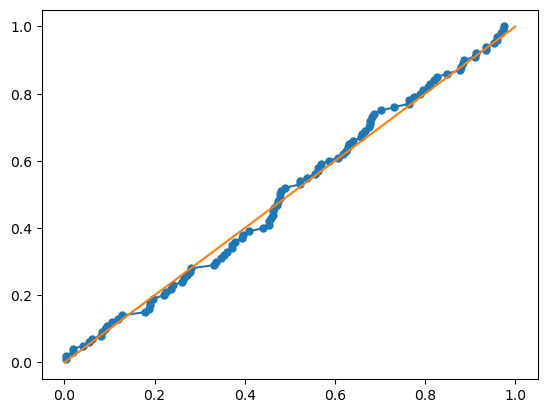

In [3]:
# Generate sorted random numbers
x = np.sort(np.random.random(size=100))

# Generate y-axis 
y = np.arange(1, len(x)+1) / len(x)

# Plot CDF from random numbers (for plotting purposes, only plot 100 points)
plt.plot(x, y, marker='.', markersize=10)

# Plot expected CDF (just a straight line from (0,0) to (1,1)
plt.plot([0, 1], [0, 1])

>__Question 1 :__ Que ce passe t'il si vous faites varier le paramètre `size` ?


La génération de nombres aléatoires sur l'intervalle uniforme est l'une des techniques de génération de nombres aléatoires les plus couramment utilisées. Beaucoup d'autres génrérations aléatoires sont dérivés de ses tirages sur la distribution uniforme.  
Par exemple, vous pouvez simuler un tirage à « tirages à pile ou face », c'est-à-dire des tirages aléatoires qui sont soit zéro, soit un.

>__Question 2 :__ Écrire une fonction `Pile_ou_Face` qui a une chance sur deux de renvoyer 'Pile' ou 'Face'.

In [5]:
def Pile_ou_Face() :
    nbRandom = np.random.random()
    if nbRandom > 0.5:
        print("Pile")
    else:
        print("Face")

In [6]:
# Generate une liste de n lancées de Pile ou Face
n=10
liste_lancees = [Pile_ou_Face() for _ in range(n)]
print(liste_lancees)

# Show which were heads, and count the number of heads


Face
Pile
Face
Face
Face
Face
Face
Face
Face
Pile
[None, None, None, None, None, None, None, None, None, None]


### Graines de générateurs de nombres pseudo-aléatoires (*seed* en anglais)

Pour démontrer que la génération de nombres aléatoires est déterministe, nous allons explicitement choisir un graîne pour la génération (grâce à la fonction `np.random.seed`) afin de montrer que nous obtenons le même aléa.

In [33]:
# Seed the RNG
np.random.seed(42)

# Generate random numbers
np.random.random(size=10)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [7]:
# Re-seed the RNG
np.random.seed(42)

# Generate random numbers
np.random.random(size=10)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

Les nombres aléatoires sont exactement les mêmes.  Si nous choisissons une graine différente, nous obtenons des nombres aléatoires totalement différents.

In [101]:
# Seed with a number that is close to the answer to everything
np.random.seed(45)
np.random.random(size=10)

array([0.98901151, 0.54954473, 0.2814473 , 0.07728957, 0.4444695 ,
       0.47280797, 0.048522  , 0.16332445, 0.11595071, 0.62739168])

Il est souvent utile de générer des nombres aléatoire grâce à des graines d'obtenir des résultats reproductibles :
- Pour des expériences scientifiques voulant être vérifier
- Pour jouer sur la même map Minecraft qu'un streamer etc...

## 2 - Sélections à partir de distributions discrètes
### 2.1 - Les entiers aléatoires

Les nombres aléatoires que nous avons générés jusqu'à présent proviennent de la distribution continue uniforme (plus de détails sur les distributions continues en troisième semaine).  Nous pouvons également tirer des nombres aléatoires à partir de distributions discrètes, l'exemple le plus courant est sans doute le choix d'un nombre entier aléatoire dans un ensemble de nombres entiers.  Par exemple, si nous voulons tirer un des quatre entiers dans `{0, 1, 2, 3}`, nous pouvons utiliser la fonction `np.random.randint()`.

In [44]:
# Draw random integers on [0, 4), i.e., exclusive of last one.
np.random.randint(0, 4, 20)

array([0, 3, 2, 1, 3, 2, 1, 2, 0, 0, 0, 2, 3, 1, 3, 0, 3, 3, 1, 3])

Grâce à cela nous pouvons simuler des lancées de dés, ou encore générer des séquences d'ADN aléatoires.

In [49]:
# Key of bases
bases = 'ATGC'

# Draw random numbers for sequence
x = np.random.randint(0, 4, 50)

# Make sequence
seq_list = [bases[x[i]] for i in range(len(x))]

# Join the sequence
''.join(seq_list)

'CTTATGTTTACGTATTTTATCTGACGTGCACTGCCCGTATATTATTCCAG'

__Question 3 :__ Quelle est la probabilité d'obtenir un double en lançant 2 dés à 6 faces ?
Retrouver expérimentalement ce résultat en modélisant `6000` double lancés de dés et en comptant le nombre de double.

Bien qu'il ait beaucoup moins de fonctionnalités que `np.random`, le module `random` de la bibliothèque standard a quelques fonctionnalités utiles.  En particulier, la méthode `random.choice()` peut prendre une chaîne en entrée et choisir des caractères dans cette chaîne.  Par exemple, pour générer des séquences d'ADN aléatoires, nous pourrions simplement faire ce qui suit.

In [53]:
import random

# Make sequence
seq_list = [random.choice('ATGC') for _ in range(50)]
    
# Join the sequence
''.join(seq_list)

'CAGGTTGCATGAGAGCAAACAAGGTCCGCGGGACGGCCACGGGTTAGTGG'

### 2.2 - Choisir des éléments dans une liste, un tableau

Il est souvent utile de choisir au hasard des éléments dans un tableau existant et c'est exactement le rôle de la fonction `np.random.choice()`.  Vous pouvez également utiliser `np.random.randint()`, où les entiers représentent les indices dans le tableau, *cependant* `np.random.choice()` possède le paramètre `replace`, qui permet de faire des tirages aléatoires avec ou sans remplacement.  

__Question 4 :__ On considère une urne contenant 6 boules blanches et 3 boules rouges, indiscernables au toucher. On tire, successivement et avec remise, 5 boules. 
1) Calculer la probabilité d’obtenir, dans cet ordre, 3 blanches et 2 rouges.
2) Retrouver expérimentalement ce résultat grâce à la version numérique de cette urne : Urne = ['B','B','B','B','B','B','R','R','R']

In [135]:
# Initialisation de l'urne
urne = ['B', 'B', 'B', 'B', 'B', 'B', 'R', 'R', 'R']

# Nombre d'essais (augmenter pour plus de précision)
n_essais = 2000000

# Variable pour compter les succès (tirage BBBRR)
compteur_succes = 0

# Simulation
for _ in range(n_essais):
    tirage = np.random.choice(urne, 5, replace=True)  # Tirer 5 boules avec remise
    if np.array_equal(tirage, ['B', 'B', 'B', 'R', 'R']):  # Vérifier si le tirage est BBBRR
        compteur_succes += 1

# Calcul de la probabilité expérimentale
probabilite_experimentale = compteur_succes / n_essais

print(f"Probabilité expérimentale d'obtenir BBBRR : {probabilite_experimentale}")

#Avec 2 millions d'essai, on obtient : 0.0330115 de probabilité d'avoir le tirage ['B', 'B', 'B', 'R', 'R']


Probabilité expérimentale d'obtenir BBBRR : 0.0330115


*Réponse*

    1) 
    2) 0.0330115 de probabilité

__Remarque :__ la fonction `np.random.permutation()` peut également être utile, elle permet de mélanger les éléments d'un tableau.

## 3 - Simulateur de Blackjack

Dans cette partie nous allons tenter de simuler une partie de Blackjack (ou au moins les premier tour).
Pour cela, voici un résumé des règles de ce jeu de cartes :

__Objectif du Jeu__

Le but du blackjack est d’obtenir une main dont la valeur est la plus proche possible de 21 __sans dépasser ce total__. Vous jouez contre le croupier, et non contre les autres joueurs.
Valeur des Cartes

    Cartes numérotées (2 à 10) : leur valeur est égale à leur numéro.
    Figures (Valet, Dame, Roi) : chacune vaut 10 points.
    As : peut valoir 1 ou 11 points, selon ce qui est le plus avantageux pour la main sans dépasser 21.

__Distribution des Cartes__

    Chaque joueur et le croupier reçoivent deux cartes.

À partir du fichier **liste_des_52_cartes** nous obtenons une liste appelée `paquet_de_carte` contenant les 52 cartes en format string.

In [82]:
# Lecture du fichier pour récupérer les cartes
with open('liste_des_52_cartes.txt', 'r') as fichier:
    contenu = fichier.read()
    nouveau_paquet_de_cartes = contenu.split(';')

# Vérification du paquet de cartes
print(nouveau_paquet_de_cartes)


['2 de Trefle', '3 de Trefle', '4 de Trefle', '5 de Trefle', '6 de Trefle', '7 de Trefle', '8 de Trefle', '9 de Trefle', '10 de Trefle', 'Valet de Trefle', 'Dame de Trefle', 'Roi de Trefle', 'As de Trefle', '2 de Carreau', '3 de Carreau', '4 de Carreau', '5 de Carreau', '6 de Carreau', '7 de Carreau', '8 de Carreau', '9 de Carreau', '10 de Carreau', 'Valet de Carreau', 'Dame de Carreau', 'Roi de Carreau', 'As de Carreau', '2 de Coeur', '3 de Coeur', '4 de Coeur', '5 de Coeur', '6 de Coeur', '7 de Coeur', '8 de Coeur', '9 de Coeur', '10 de Coeur', 'Valet de Coeur', 'Dame de Coeur', 'Roi de Coeur', 'As de Coeur', '2 de Pique', '3 de Pique', '4 de Pique', '5 de Pique', '6 de Pique', '7 de Pique', '8 de Pique', '9 de Pique', '10 de Pique', 'Valet de Pique', 'Dame de Pique', 'Roi de Pique', 'As de Pique\n']


>__Question 5 :__ Écrire une fonction `pioche` qui prend en entrée un paquet de carte, qui en enlève une et la renvoie.

In [78]:
def pioche(paquet):

    carte_piochee = np.random.choice(paquet, 1, replace=False)
    paquet.remove(carte_piochee)

    print(f"Carte piochée: {carte_piochee[0]}")
    
    print(f"Nombre de cartes restantes dans le paquet: {len(paquet)}")
    
    return(carte_piochee)

pioche(nouveau_paquet_de_cartes)


Carte piochée: Valet de Pique
Nombre de cartes restantes dans le paquet: 50


array(['Valet de Pique'], dtype='<U16')

>__Question 6 :__ Générer une fonction tirant un premier tour des cartes du Blackjack en fonction du nombre de joueurs.

In [114]:
def premier_tour_blackjack(paquet_de_carte, nombre_de_joueurs):
    main_joueurs = []

    for _ in range(nombre_de_joueurs):
        for __ in range(2):
            main_joueurs.append(pioche(paquet_de_carte))

    return main_joueurs

#Exemple d'utilisation :
nombre_de_joueurs = 1
paquet_de_carte=nouveau_paquet_de_cartes.copy()
main_joueurs = premier_tour_blackjack(paquet_de_carte, nombre_de_joueurs)
print("Main des joueurs après le premier tour:", main_joueurs)


Carte piochée: Roi de Pique
Nombre de cartes restantes dans le paquet: 51
Carte piochée: 2 de Trefle
Nombre de cartes restantes dans le paquet: 50
Main des joueurs après le premier tour: [array(['Roi de Pique'], dtype='<U16'), array(['2 de Trefle'], dtype='<U16')]


>__Question 7 :__ Ecrire une fonction qui donne la valeur entre 1 et 21 d'une liste de carte de Blackjack

In [116]:
def valeur_blackjack(main):
    
    return valeur_totale

# Exemple d'utilisation :
# main = ['As de Trèfle', '10 de Carreau']
# print("Valeur de la main:", valeur_blackjack(main))  # Sortie attendue : 21


In [117]:
main_joueurs[1]

array(['2 de Trefle'], dtype='<U16')

In [118]:
print(valeur_blackjack(main_joueurs[1]))
print(valeur_blackjack(['10 de Trèfle', '7 de Pique','As de Pique']))

NameError: name 'valeur_totale' is not defined

>__Question 8 :__ Quelle est la probabilité (experimentale) d'obtenir un Blackjack (exactement 21 points) en main de départ à 2 joueurs? Comment auriez-vous fais pour retrouver théoriquement ce résultat ?